In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

In [83]:
x_train=pd.read_csv('../data/x_train.csv',delimiter=",")
y_train=pd.read_csv('../data/y_train.csv',delimiter=",")
x_test=pd.read_csv('../data/x_test.csv',delimiter=",")
y_test=pd.read_csv('../data/y_test.csv',delimiter=",")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(16999, 1024) (16999, 1) (2999, 1024) (2999, 1)


In [84]:
x_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
x_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#list of all digits that are going to be predicted
np.sort(y_train.iloc[0].unique())

array([8])

In [87]:
#define the number of samples for training set and for validation set
num_train,num_validation = int(len(x_train)),int(len(x_test))

In [88]:
num_train,num_validation

(16999, 2999)

In [90]:
#generate training data from train_file
#generate training data from train_file
x_train,y_train=x_train.iloc[:num_train,0:].values,y_train.iloc[:num_train,0].values
print(x_train.shape,x_test.shape)

(16999, 1024) (2999, 1024)


In [91]:
x_validation,y_validation=x_train[:,0:],y_train[0:]
print(x_validation.shape,y_validation.shape,x_validation,y_validation)

(16999, 1024) (16999,) [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]] [8 5 6 ..., 6 9 2]


In [92]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(16999, 1024)
(16999,)
(16999, 1024)
(16999,)


# Visualize Training Data

Label: 8


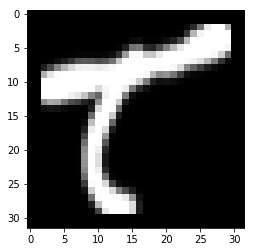

In [93]:
index=4

print("Label: " + str(y_train[index]))
plt.imshow(x_train[index].reshape((32,32)),cmap='gray')
plt.show()

In [94]:
#fit a Random Forest classifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
#predict value of label using classifier
prediction_validation = clf.predict(x_validation)
prediction_test = clf.predict(x_test)
y_pred=clf.predict(x_test)

print(prediction_validation.shape,y_validation.shape)

(16999,) (16999,)


In [96]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.999529384081


In [97]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test,y_pred))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       300
          1       0.98      1.00      0.99       300
          2       0.89      0.94      0.92       300
          3       0.90      0.89      0.89       300
          4       0.98      0.99      0.98       300
          5       0.94      0.93      0.94       300
          6       0.99      0.95      0.97       300
          7       0.99      0.98      0.98       299
          8       0.99      0.99      0.99       300
          9       0.99      0.97      0.98       300

avg / total       0.96      0.96      0.96      2999



In [100]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_test,y_pred)))

Validation Confusion Matrix: 
[[299   0   0   0   0   0   0   1   0   0]
 [  1 299   0   0   0   0   0   0   0   0]
 [  0   2 282  10   0   6   0   0   0   0]
 [  1   2  23 266   0   4   1   0   1   2]
 [  0   1   0   3 296   0   0   0   0   0]
 [  1   0   5  11   3 280   0   0   0   0]
 [  1   1   5   1   1   4 284   1   2   0]
 [  1   0   1   1   0   2   1 293   0   0]
 [  0   0   0   0   2   1   0   0 296   1]
 [  0   1   0   3   1   0   2   1   1 291]]


# View predictions for Test data

Predicted 3


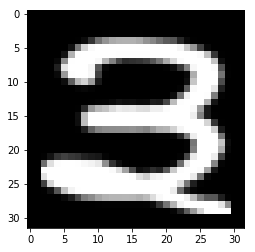

In [103]:
index=49
#testing data is 2998 so index takes values upto 2998
print("Predicted " + str(prediction_test[index]))
plt.imshow(x_test.iloc[index].values.reshape((32,32)),cmap='gray')